In [50]:
# Importando bibliotecas
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [30]:
# Importando DataSets (download via kaggle)
df = pd.read_csv('sign_lan/sign_mnist_train.csv')
df2 = pd.read_csv('sign_lan/sign_mnist_test.csv')

In [31]:
# Instanciando X e y
y = df['label'].values
X = df.iloc[:,1:].values
y_t = df2['label'].values
X_t = df2.iloc[:,1:].values

In [32]:
# Transformando de 2D para 3D (treino)
temp_images = []
for row in X:
    image_data = np.array_split(row, 28)
    temp_images.append(image_data)

In [33]:
# Transformando de 2D para 3D (teste)
temp_images_t = []
for row in X_t:
    image_data = np.array_split(row, 28)
    temp_images_t.append(image_data)

In [35]:
# Verificando formato
# Formato inicial: (numerodeexemplo, dados da imagem em 1D)
# Aqui devemos ter seguinte formato: (numdeexemplos, altura, largura)
print(np.array(temp_images).astype('float').shape)
print(y.shape)
print(np.array(temp_images_t).astype('float').shape)
print(y_t.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [44]:
# Expandindo para 4 dimensões: (numerodeexemplos, largura, altura, canaisdecor)
training_images = np.expand_dims(temp_images, axis=3)
testing_images = np.expand_dims(temp_images_t, axis=3)
training_labels = y
testing_labels = y_t

In [37]:
# Conferindo resultado
training_images.shape, testing_images.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [38]:
# Criando datagen para treino e teste

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
# Modelo CNN:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26,activation=tf.nn.softmax)
])

In [43]:
# Definindo otimizador e função perda
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
# Treino do modelo
history = model.fit(
    train_datagen.flow(training_images, training_labels, batch_size=32),
    steps_per_epoch= len(training_images)/32,
    epochs = 15,
    validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
    validation_steps = len(testing_images) / 32
)

Epoch 1/15
858/857 [==============================] - 31s 37ms/step - loss: 2.8635 - accuracy: 0.1339 - val_loss: 2.0130 - val_accuracy: 0.3483
Epoch 2/15
858/857 [==============================] - 31s 36ms/step - loss: 2.1441 - accuracy: 0.3236 - val_loss: 1.4372 - val_accuracy: 0.5264
Epoch 3/15
858/857 [==============================] - 31s 36ms/step - loss: 1.7415 - accuracy: 0.4390 - val_loss: 1.1603 - val_accuracy: 0.6247
Epoch 4/15
858/857 [==============================] - 34s 39ms/step - loss: 1.5017 - accuracy: 0.5111 - val_loss: 0.9665 - val_accuracy: 0.6523
Epoch 5/15
858/857 [==============================] - 39s 45ms/step - loss: 1.3707 - accuracy: 0.5544 - val_loss: 0.8950 - val_accuracy: 0.6721
Epoch 6/15
858/857 [==============================] - 39s 45ms/step - loss: 1.2620 - accuracy: 0.5839 - val_loss: 0.9364 - val_accuracy: 0.6665
Epoch 7/15
858/857 [==============================] - 39s 45ms/step - loss: 1.1681 - accuracy: 0.6192 - val_loss: 0.7428 - val_accuracy:

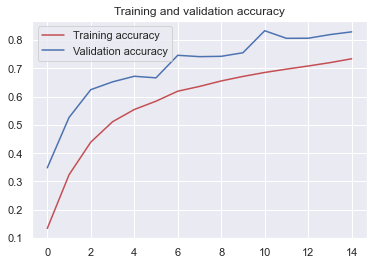

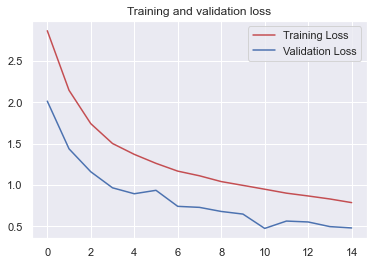

In [49]:
# Plotando resultados

sns.set()
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()